In [1]:
#%%
import sys
import os
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
from database.databaseFunctions import *
import pickle
#############
#############
###paths#####
#############

import sys
import os
import pickle
import psycopg2
import matplotlib.pyplot as plt

from numerical.cn_plot import plot1D, surfpattern
from database.databaseFunctions import *
from matplotlib import cm
from analytical.linear_stability_analysis import big_turing_analysis_df, detailed_turing_analysis_dict
from randomfunctions import  plot_highest_dispersion_hopf, plot_highest_dispersion



In [31]:

def find_parID_from_pattern_class_nogrowth_and_pattern_class_openboundary( pattern_class_nogrowth, pattern_class_openboundary):
    query = lambda pattern_class_nogrowth,system_class:  f'''select mp."parID",  pco.pattern_class_nogrowth, pco.pattern_class_openboundary
    from pattern_class_output pco
    join model_param mp on mp.model_param_id = pco.model_param_id
    join analytical_output ao on ao.model_param_id = pco.model_param_id
    where pco.simulation_param_uuid = 'f557b922-67b0-4d93-aad1-4a6c362240c9' --nogrowth
            and ss_n=1
    and( mp.variant='9' or mp.variant='8')
    and mp.n_samples=1000000
    and mp.circuit_n='turinghill'
    and pco.pattern_class_nogrowth='{pattern_class_nogrowth}'
    and ao.system_class='{system_class}' ;'''

    output,column_names = general_query(query(pattern_class_nogrowth,system_class))
    df = pd.DataFrame(output, columns=['parID', 'system_class', 'pattern_class_nogrowth'])
    df.set_index('parID', inplace=True)
    return df



def find_parID_dict(parID, variant):
    query = lambda parID:  f'''select *
    from model_param mp 
    where circuit_n='turinghill'
    and variant = '{variant}'
    and n_samples=1000000
    
    and "parID"={parID}'''
    output,column_names = general_query(query(parID))
    df = pd.DataFrame(output, columns=column_names, dtype=float)
    df.set_index('parID', inplace=True)

    return df.loc[parID].to_dict()


    


In [43]:
L=50; dx =0.1; J = int(L/dx)
T =2000; dt = 0.02; N = int(T/dt)
rate=L/T
suggesteddt = float(dx*dx*2)

circuit_n='turinghill'
variant= '9'
n_samples=1000000
ssID = 0
folder = f'{circuit_n}_variant{variant}'
model_param_dict =  lambda parID, variant: {'parID':parID, 'circuit_n':circuit_n,'variant':variant, 'n_samples':n_samples}
simulation_param_dict = {'L':L, 'dx':dx, 'J':J, 'T':T, 'dt':dt, 'N':N, 'boundaryCoeff':1, 'mechanism':'nogrowth', 'growth_rate': rate}


# Types of pattern_class_nogrowth

In [70]:
df = find_parID_from_systemclass_and_pattern_class_nogrowth('hopf', 'Non-Stationary pattern' )


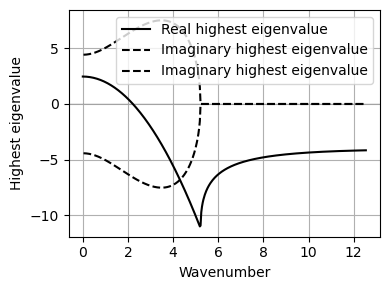

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:3632374_circuit:turinghill_variant:8_samples:1000000


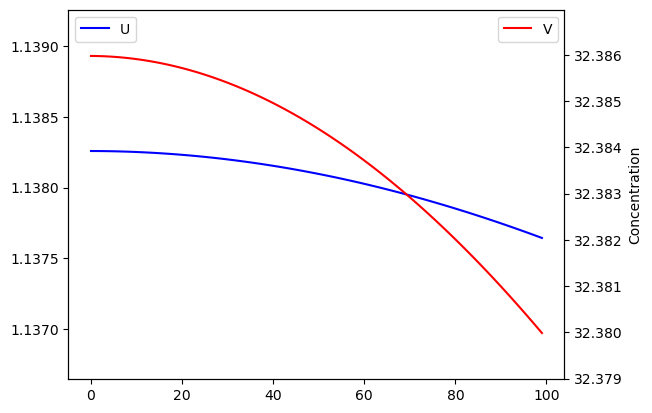

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:3632374_circuit:turinghill_variant:8_samples:1000000


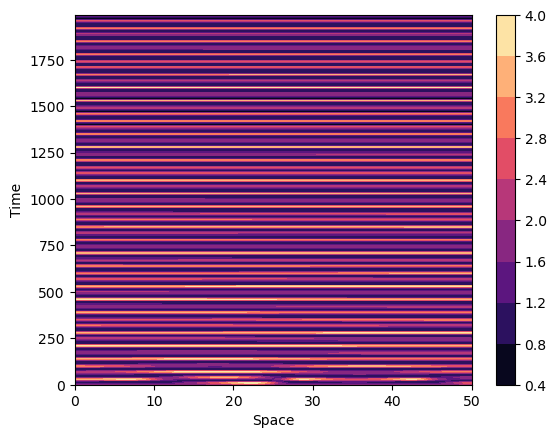

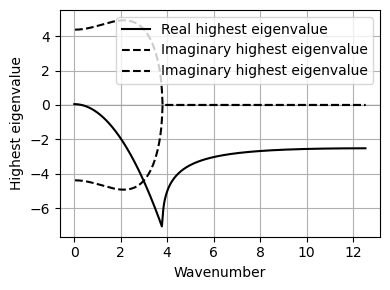

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4461035_circuit:turinghill_variant:8_samples:1000000


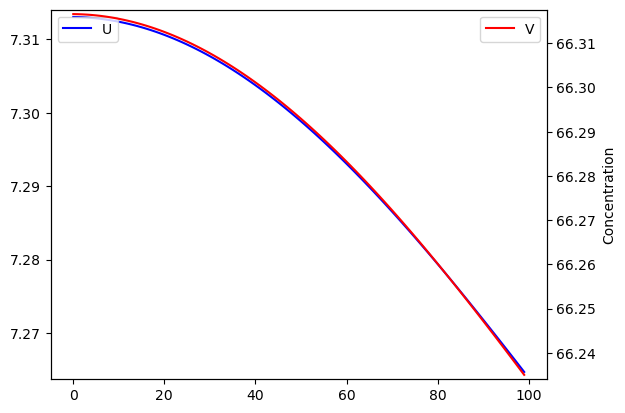

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4461035_circuit:turinghill_variant:8_samples:1000000


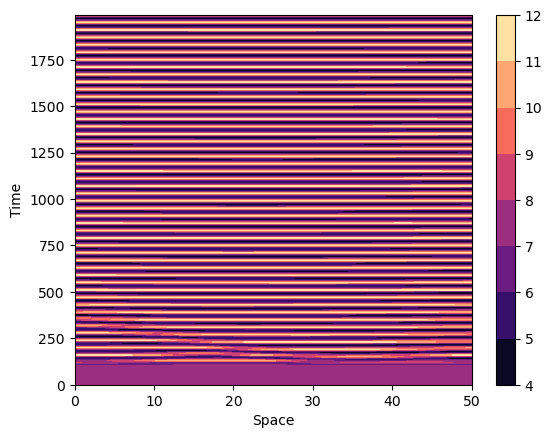

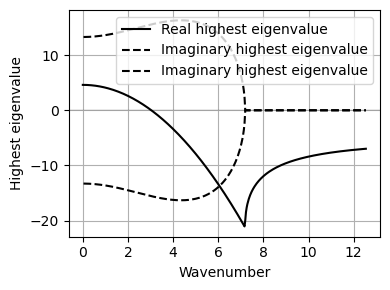

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:781706_circuit:turinghill_variant:8_samples:1000000


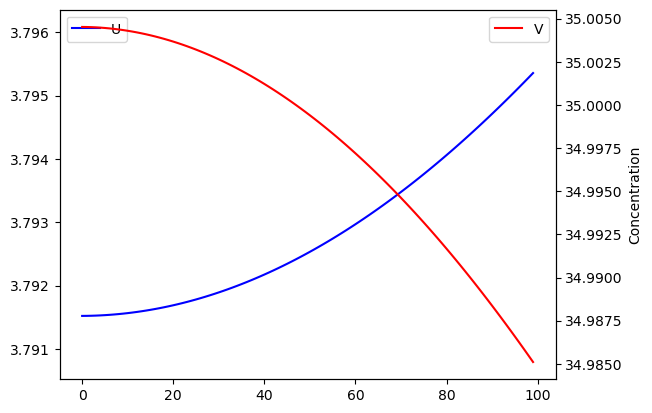

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:781706_circuit:turinghill_variant:8_samples:1000000


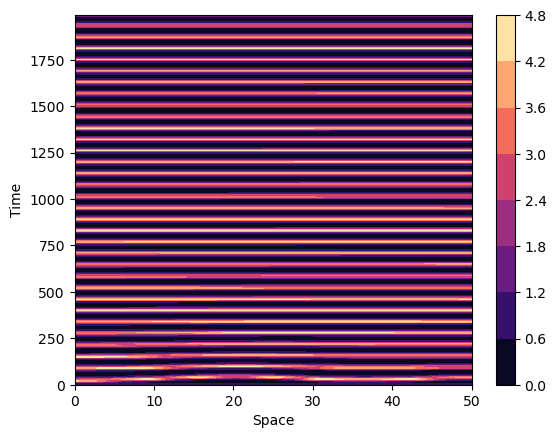

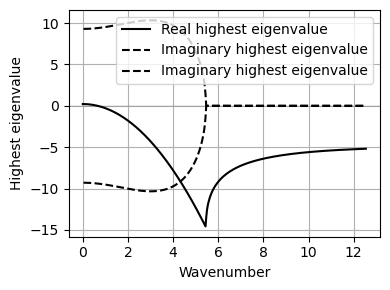

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:1875391_circuit:turinghill_variant:8_samples:1000000


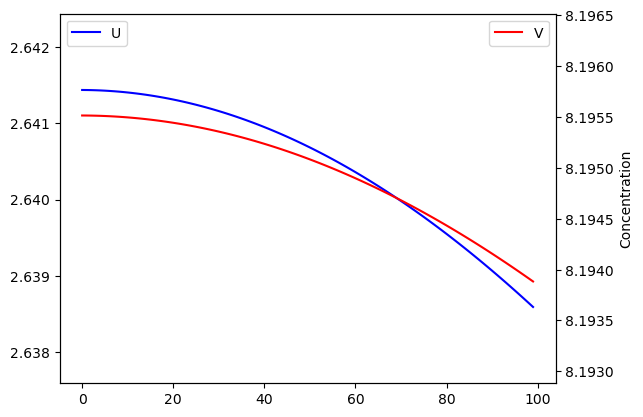

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:1875391_circuit:turinghill_variant:8_samples:1000000


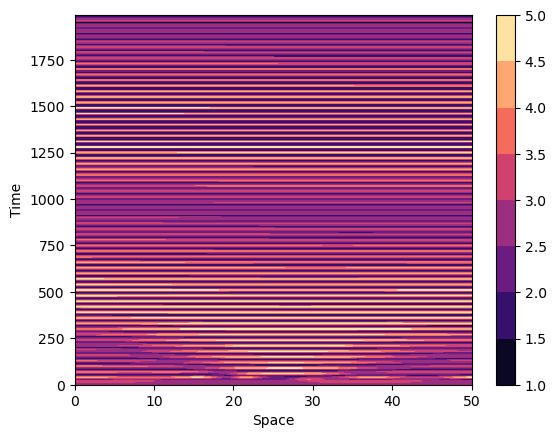

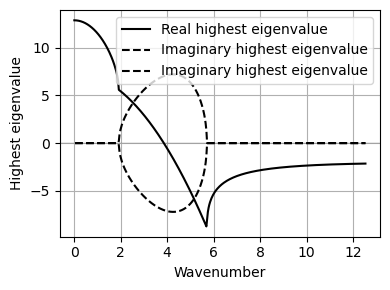

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4103787_circuit:turinghill_variant:8_samples:1000000


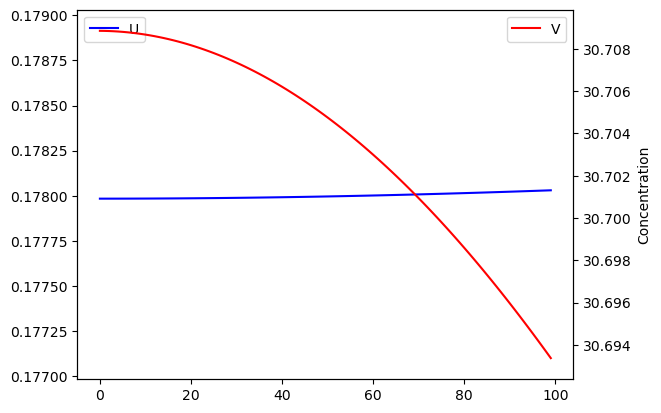

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4103787_circuit:turinghill_variant:8_samples:1000000


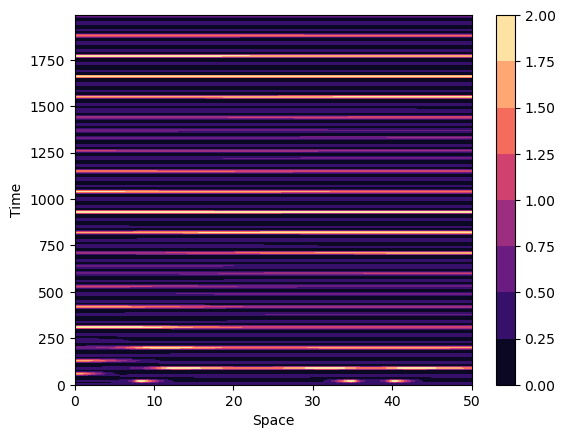

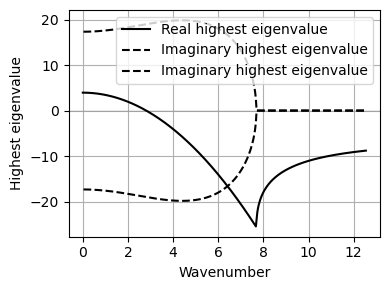

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2102597_circuit:turinghill_variant:8_samples:1000000


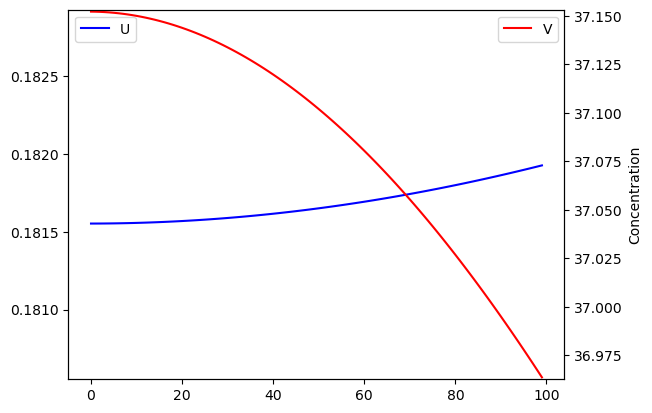

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2102597_circuit:turinghill_variant:8_samples:1000000


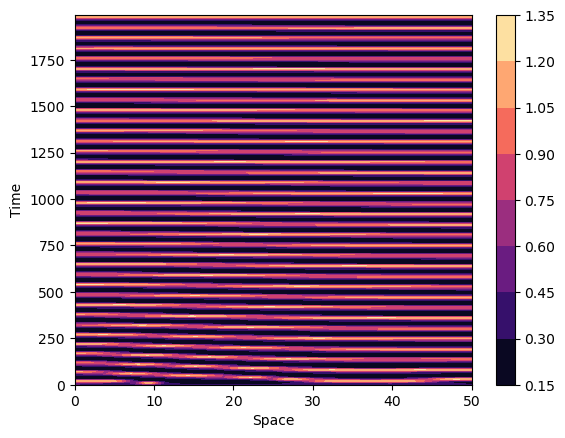

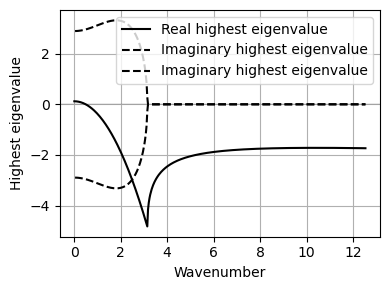

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:932488_circuit:turinghill_variant:8_samples:1000000


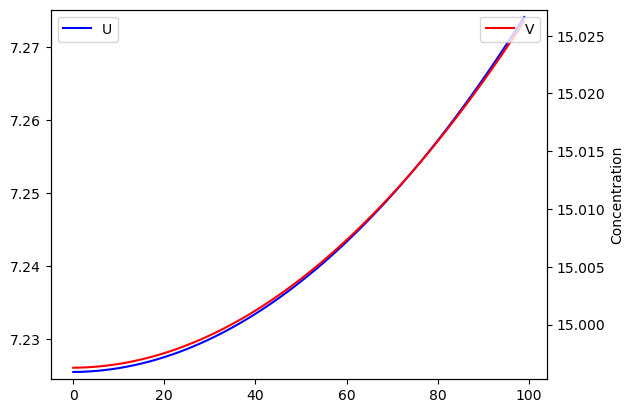

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:932488_circuit:turinghill_variant:8_samples:1000000


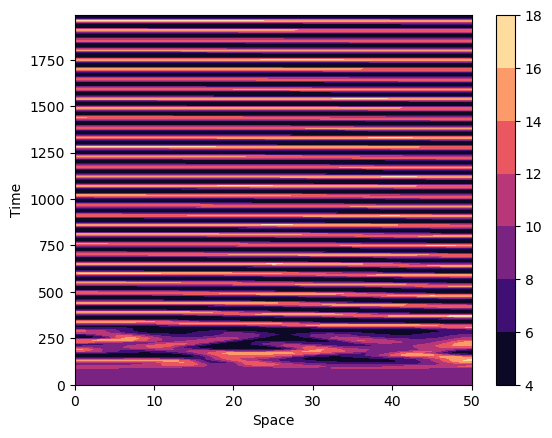

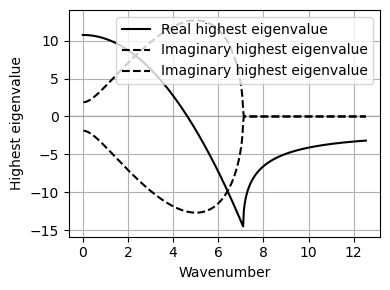

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2015009_circuit:turinghill_variant:8_samples:1000000


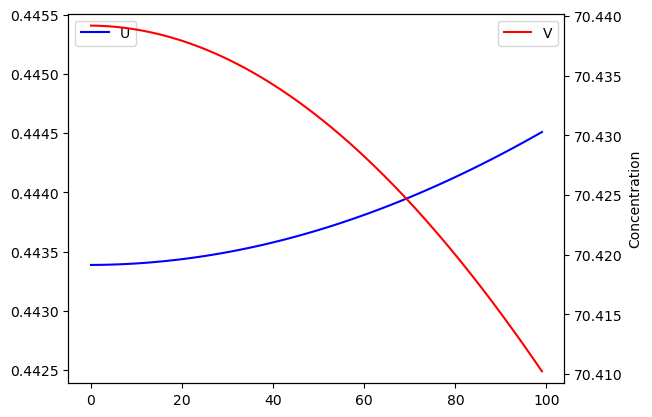

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2015009_circuit:turinghill_variant:8_samples:1000000


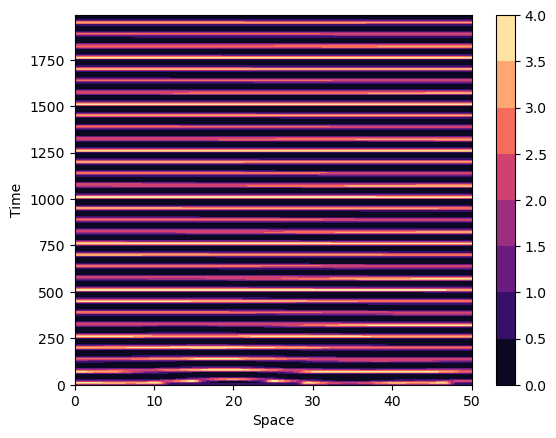

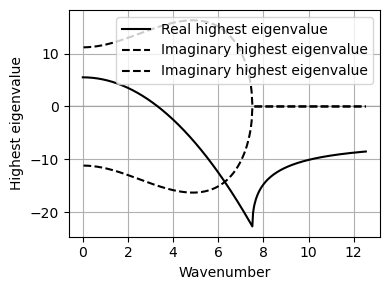

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4158232_circuit:turinghill_variant:8_samples:1000000


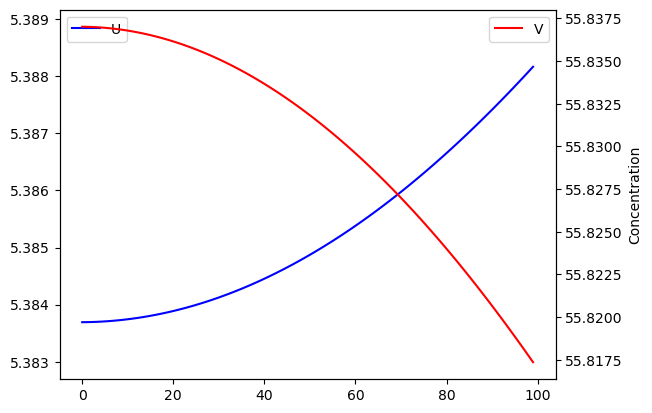

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4158232_circuit:turinghill_variant:8_samples:1000000


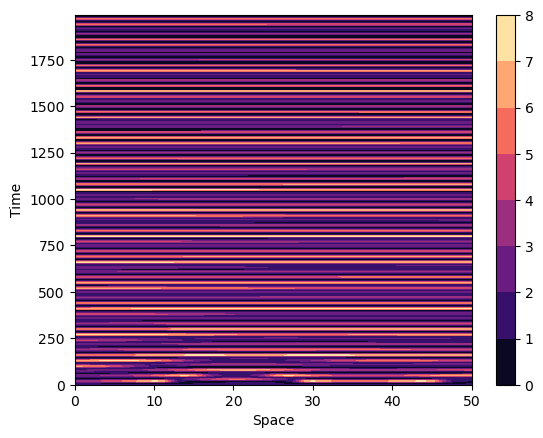

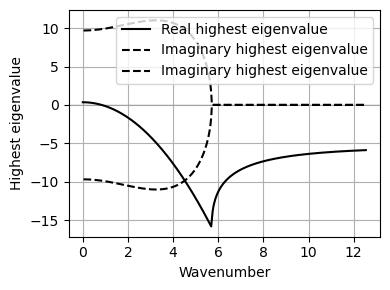

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4351557_circuit:turinghill_variant:8_samples:1000000


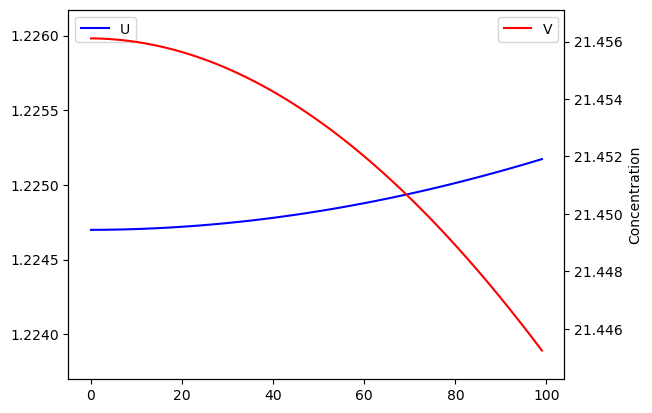

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4351557_circuit:turinghill_variant:8_samples:1000000


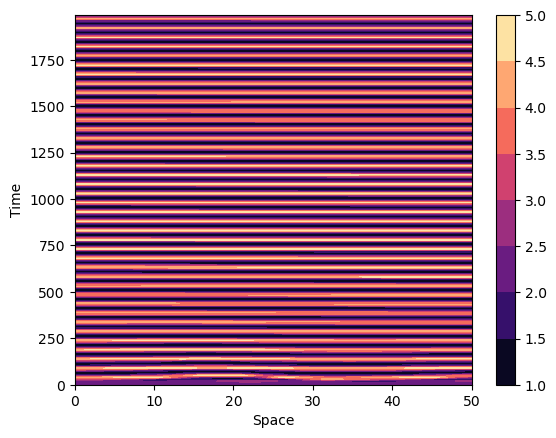

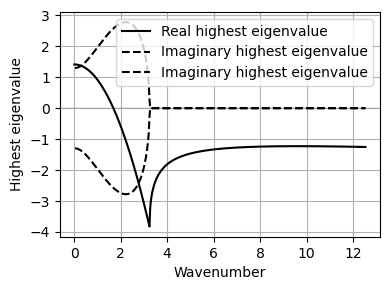

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5432094_circuit:turinghill_variant:8_samples:1000000


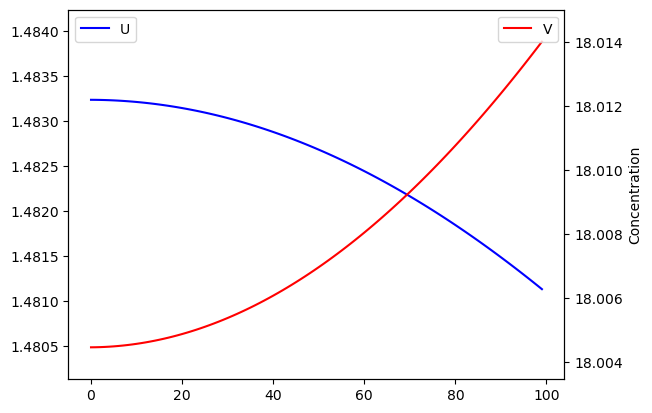

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5432094_circuit:turinghill_variant:8_samples:1000000


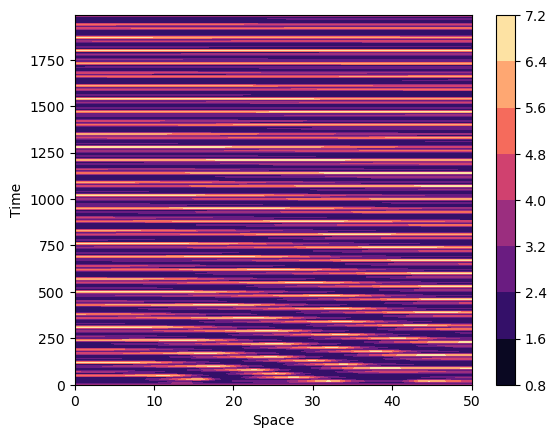

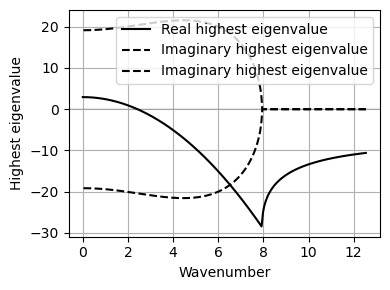

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:3668687_circuit:turinghill_variant:8_samples:1000000


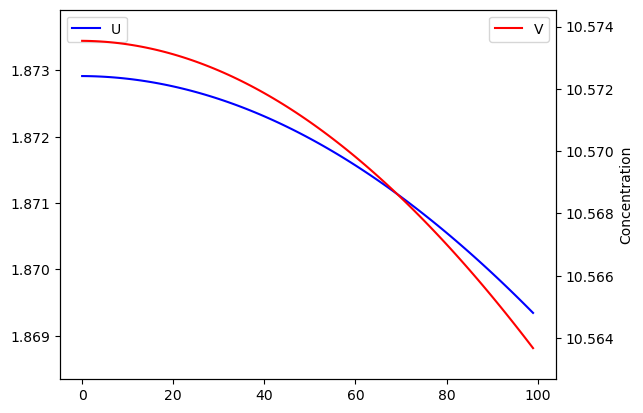

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:3668687_circuit:turinghill_variant:8_samples:1000000


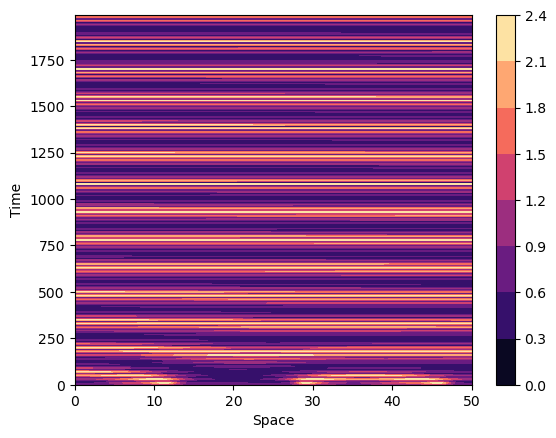

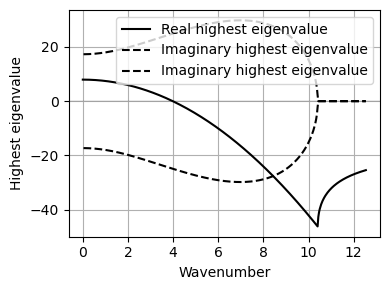

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5126802_circuit:turinghill_variant:8_samples:1000000


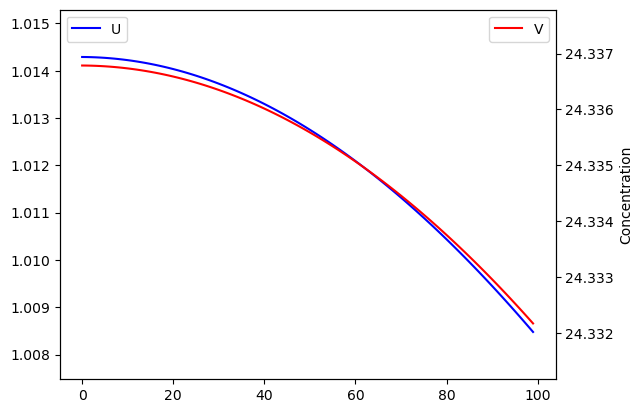

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5126802_circuit:turinghill_variant:8_samples:1000000


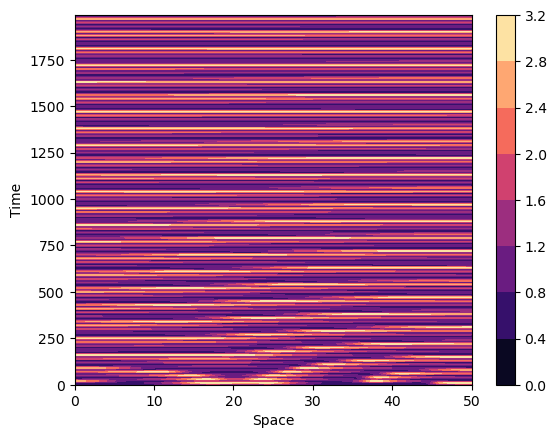

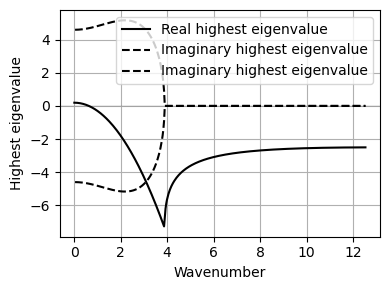

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5961397_circuit:turinghill_variant:8_samples:1000000


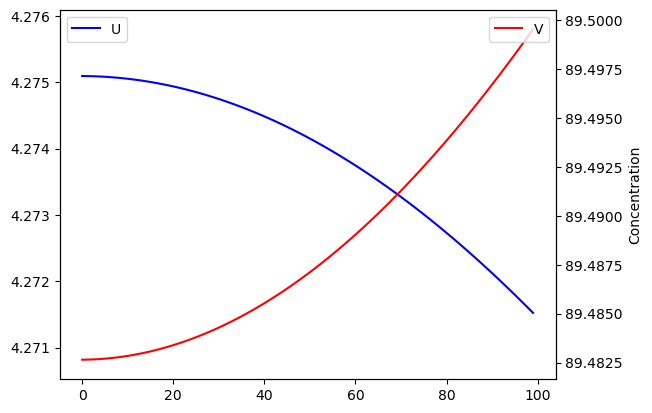

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5961397_circuit:turinghill_variant:8_samples:1000000


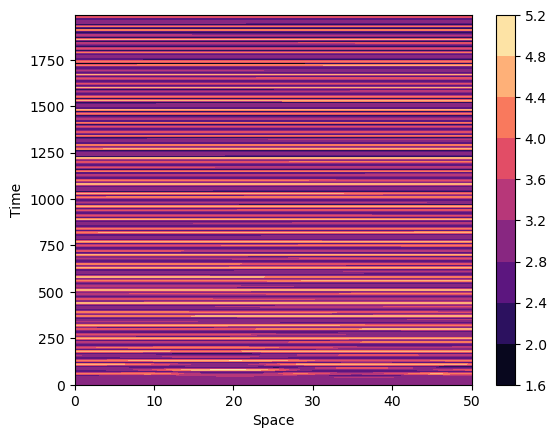

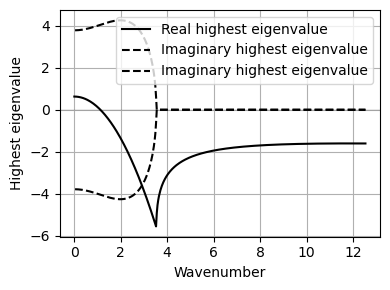

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5188602_circuit:turinghill_variant:8_samples:1000000


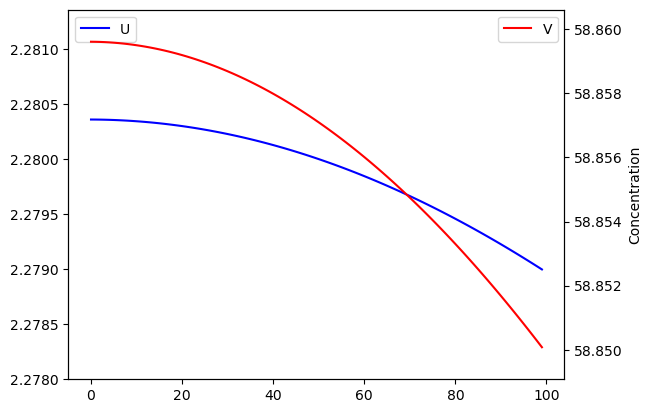

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5188602_circuit:turinghill_variant:8_samples:1000000


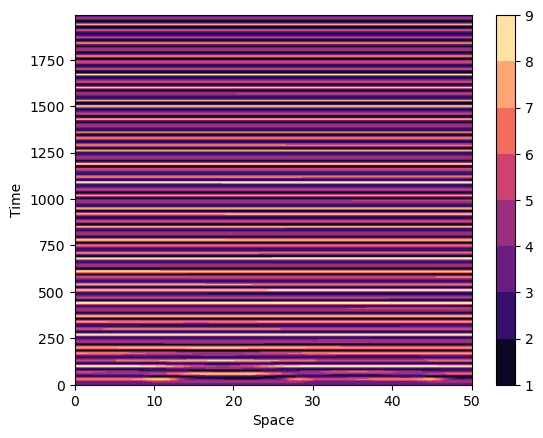

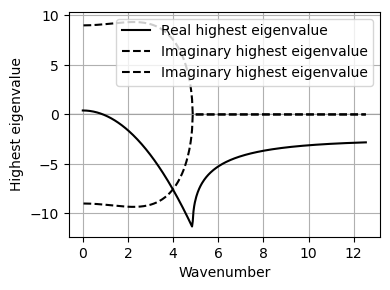

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5178668_circuit:turinghill_variant:8_samples:1000000


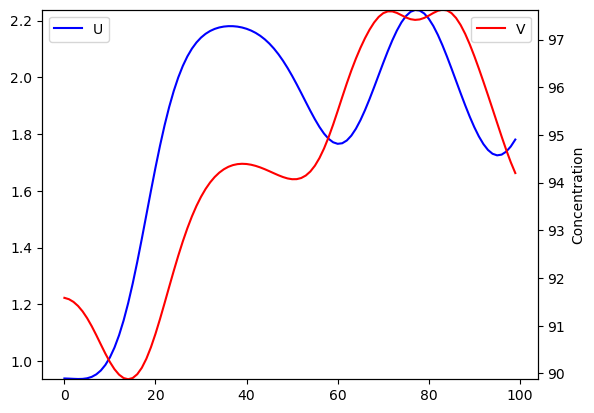

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5178668_circuit:turinghill_variant:8_samples:1000000


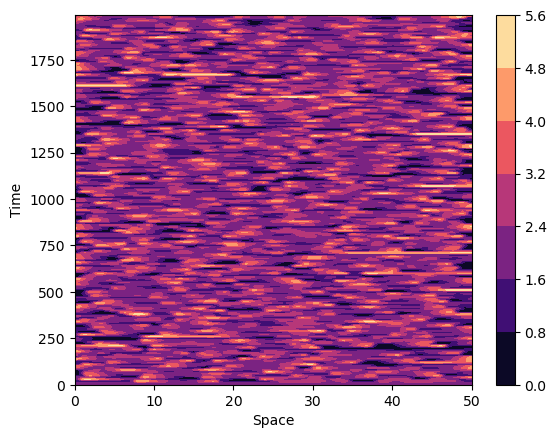

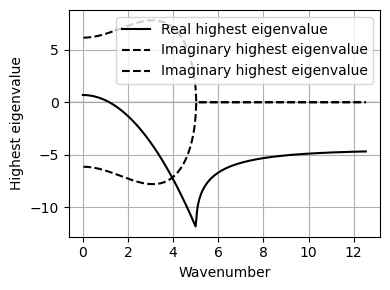

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5630810_circuit:turinghill_variant:8_samples:1000000


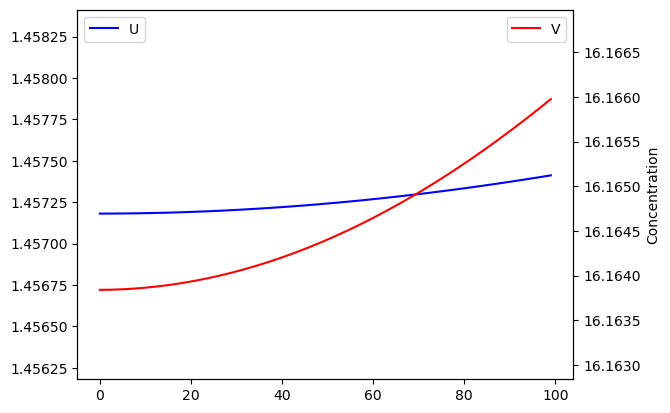

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5630810_circuit:turinghill_variant:8_samples:1000000


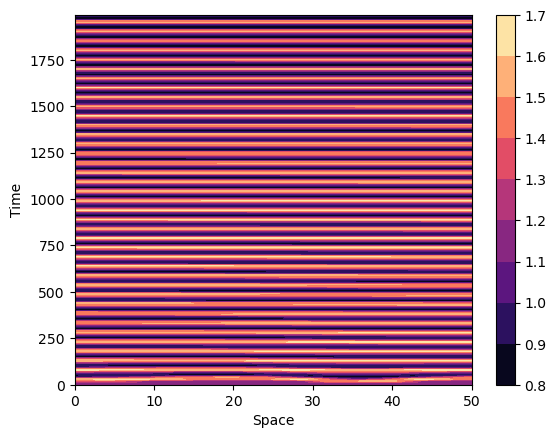

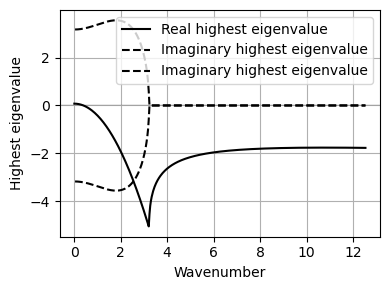

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:6196235_circuit:turinghill_variant:8_samples:1000000


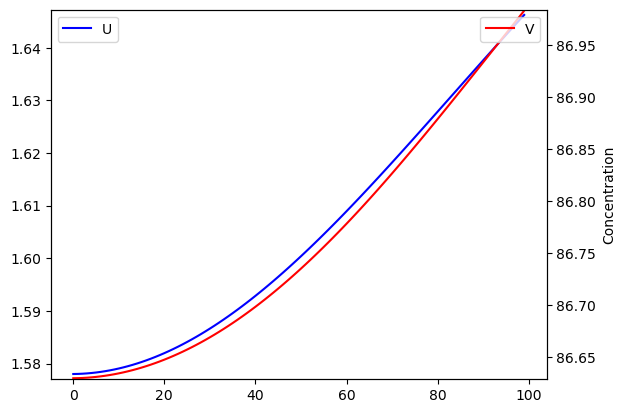

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:6196235_circuit:turinghill_variant:8_samples:1000000


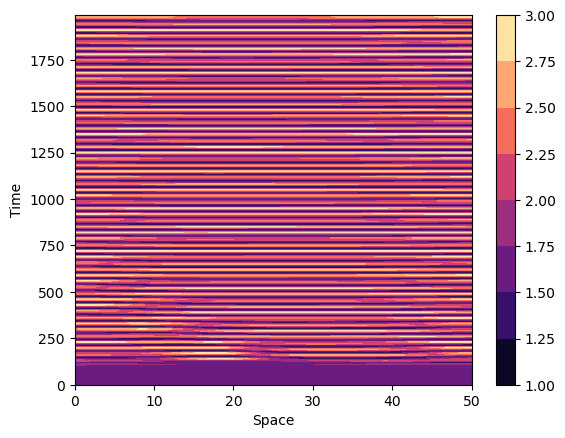

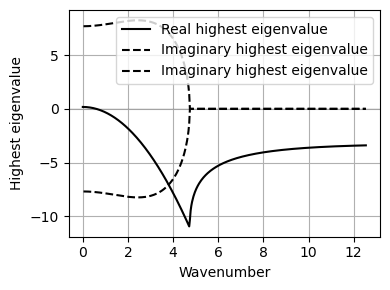

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2472098_circuit:turinghill_variant:8_samples:1000000


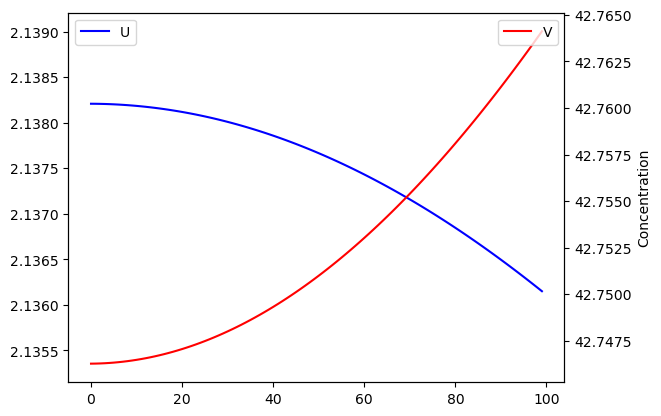

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2472098_circuit:turinghill_variant:8_samples:1000000


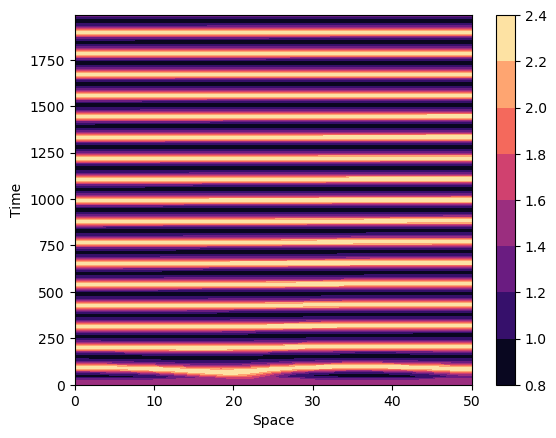

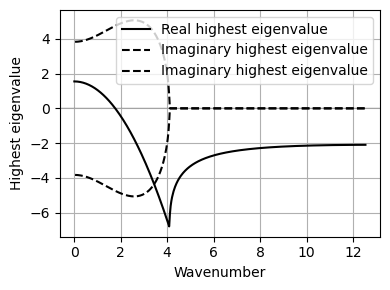

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2587894_circuit:turinghill_variant:8_samples:1000000


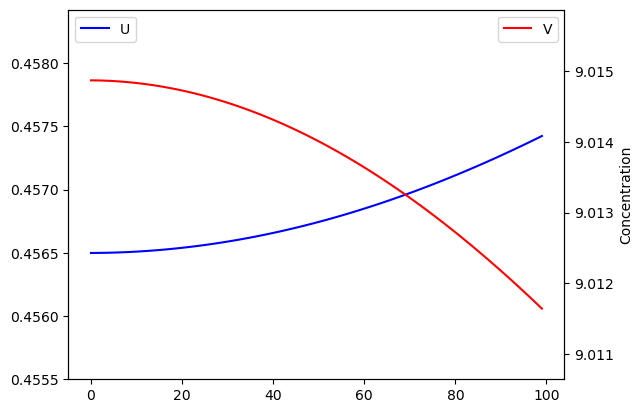

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2587894_circuit:turinghill_variant:8_samples:1000000


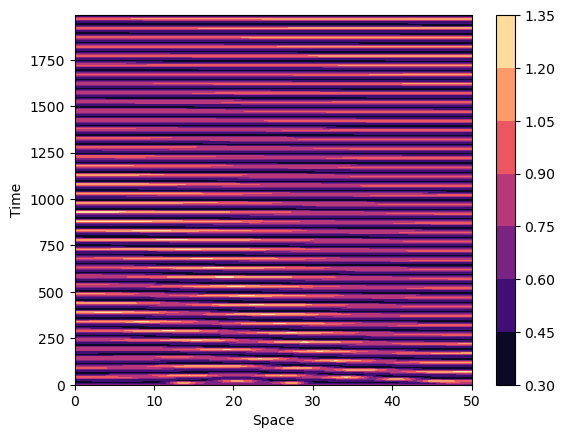

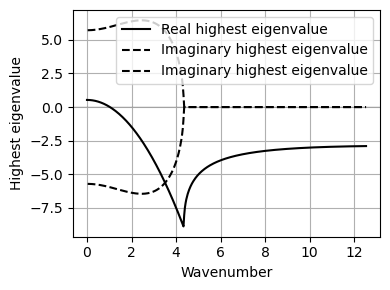

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:497283_circuit:turinghill_variant:8_samples:1000000


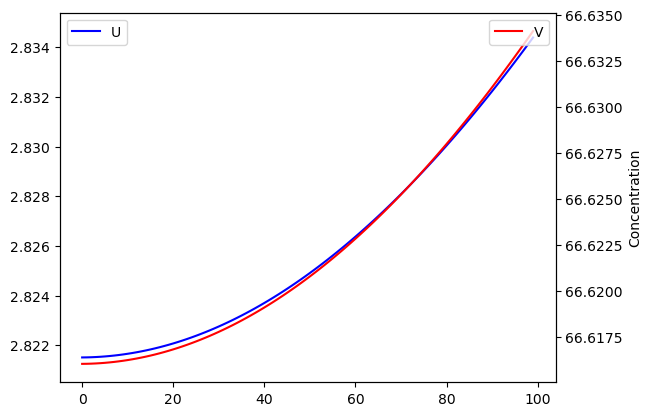

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:497283_circuit:turinghill_variant:8_samples:1000000


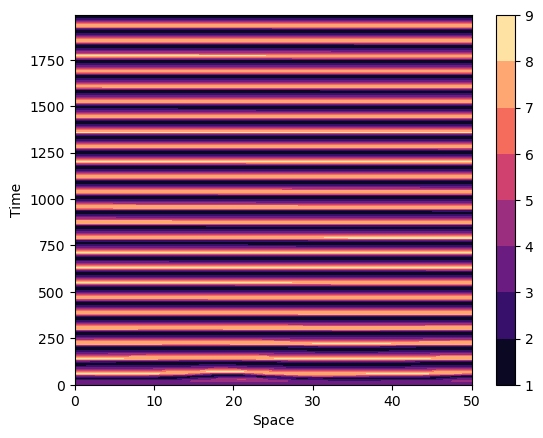

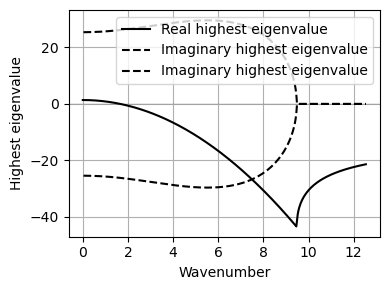

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:1426609_circuit:turinghill_variant:8_samples:1000000


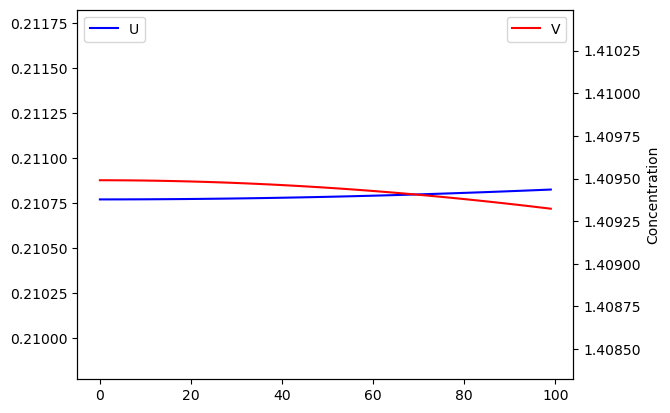

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:1426609_circuit:turinghill_variant:8_samples:1000000


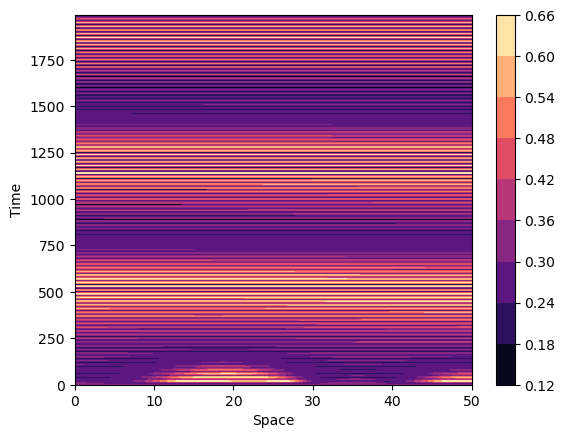

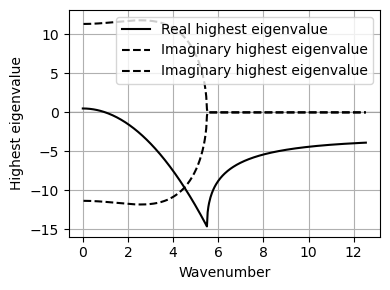

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2301166_circuit:turinghill_variant:8_samples:1000000


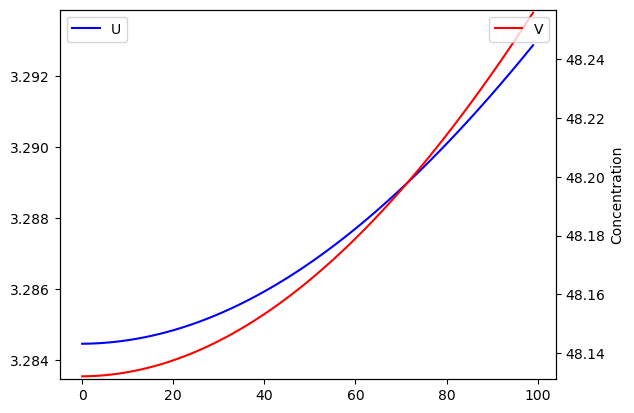

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2301166_circuit:turinghill_variant:8_samples:1000000


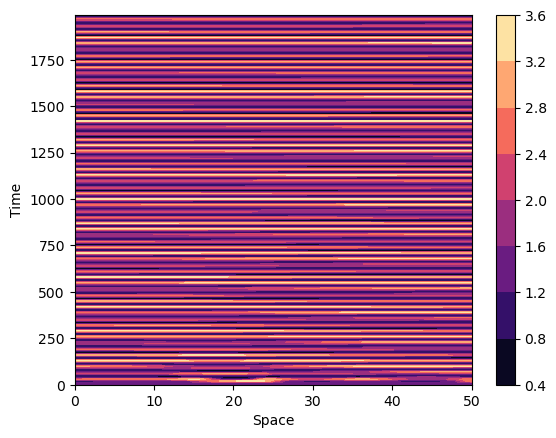

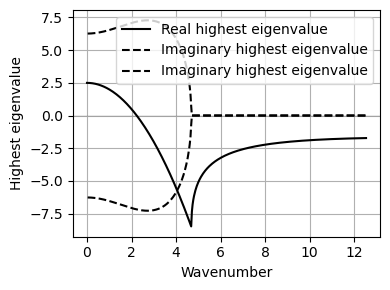

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:3907760_circuit:turinghill_variant:8_samples:1000000


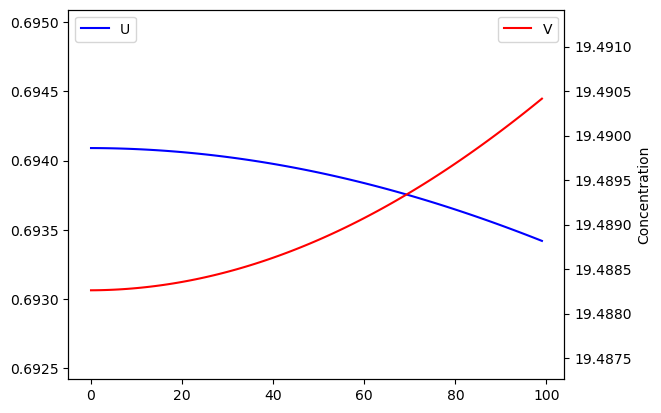

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:3907760_circuit:turinghill_variant:8_samples:1000000


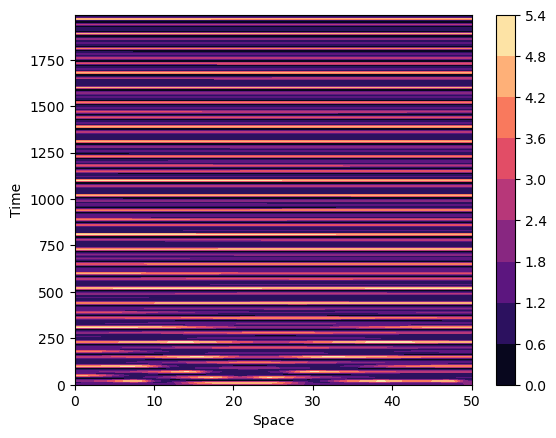

In [71]:
parID = 6196235
for parID in df.index:
    par_dict = find_parID_dict(parID, 8)
    out = detailed_turing_analysis_dict(par_dict, circuit_n, 2)
    plot_highest_dispersion_hopf(out[4][0], crop=400)
    plt.show()

    parID = parID
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID,8),'U_final_1D', ssID=0)
    plot1D(U_final, savefig=False,filename='', space_crop=100)
    plt.show()

    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID,8),'U_record_1D', ssID=0)
    surfpattern(U_record,L,dx,J,T, savefig=False,filename='',cmap=cm.magma)
    plt.show()




## Complex unstable

### temporal oscillator

In [23]:


df = find_parID_from_systemclass_and_pattern_class_nogrowth('complex unstable', 'Stationary pattern' )
df

,system_class,pattern_class_nogrowth
parID,,
4892935,complex unstable,Stationary pattern
2015009,complex unstable,Stationary pattern
388372,complex unstable,Stationary pattern
8051970,complex unstable,Stationary pattern
9925292,complex unstable,Stationary pattern
3632374,complex unstable,Stationary pattern
4158232,complex unstable,Stationary pattern
5755658,complex unstable,Stationary pattern
8320736,complex unstable,Stationary pattern


simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4892935_circuit:turinghill_variant:9_samples:1000000


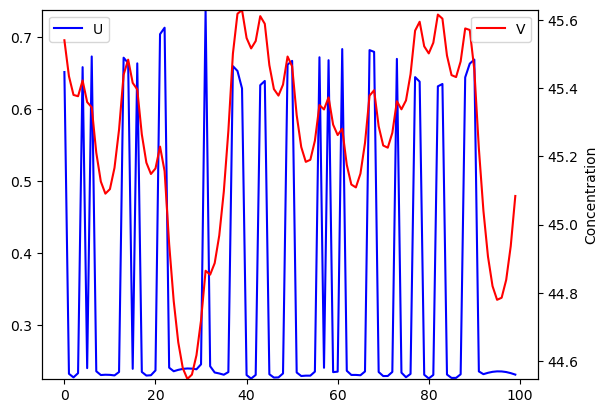

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:2015009_circuit:turinghill_variant:9_samples:1000000


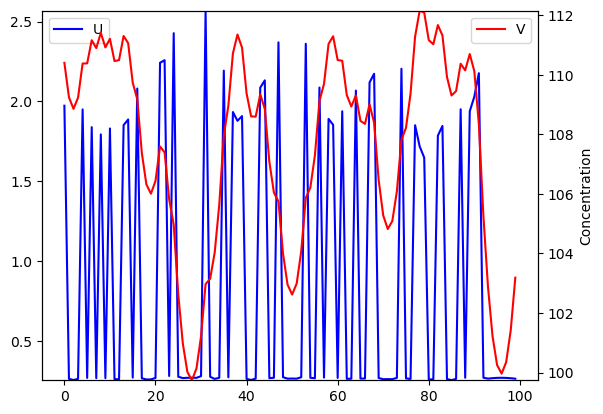

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:388372_circuit:turinghill_variant:9_samples:1000000


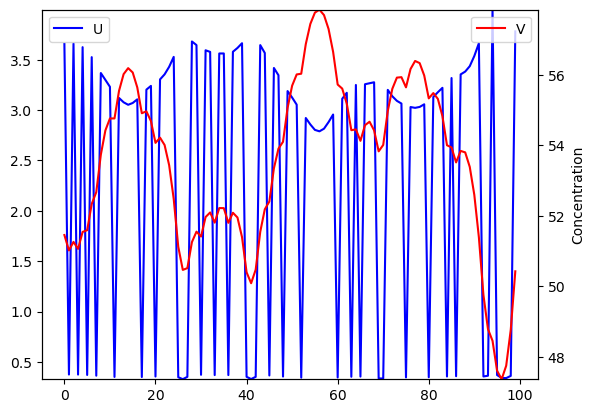

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:8051970_circuit:turinghill_variant:9_samples:1000000


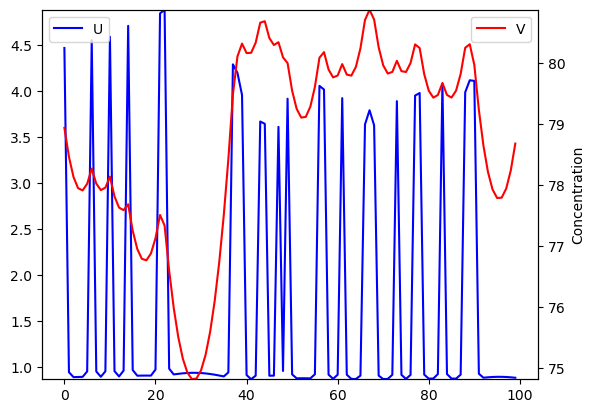

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:9925292_circuit:turinghill_variant:9_samples:1000000


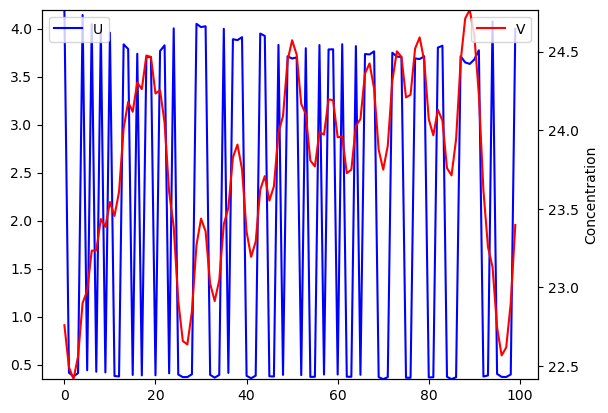

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:3632374_circuit:turinghill_variant:9_samples:1000000


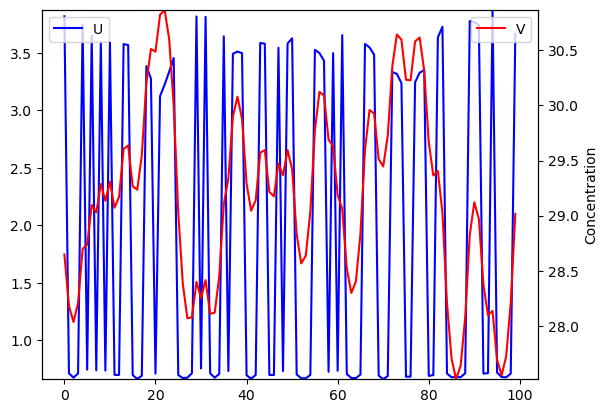

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:4158232_circuit:turinghill_variant:9_samples:1000000


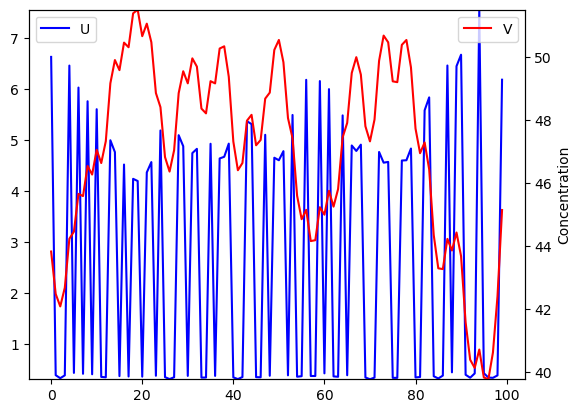

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5755658_circuit:turinghill_variant:9_samples:1000000


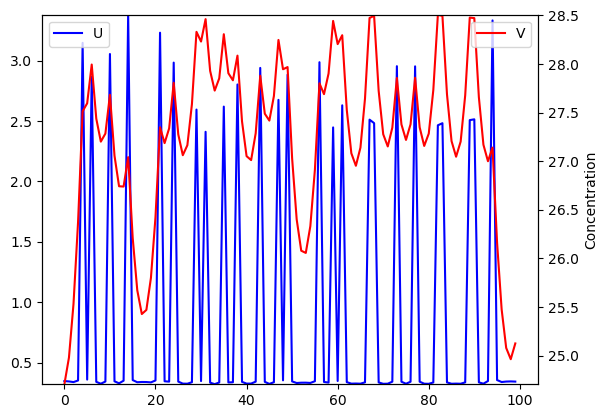

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:8320736_circuit:turinghill_variant:9_samples:1000000


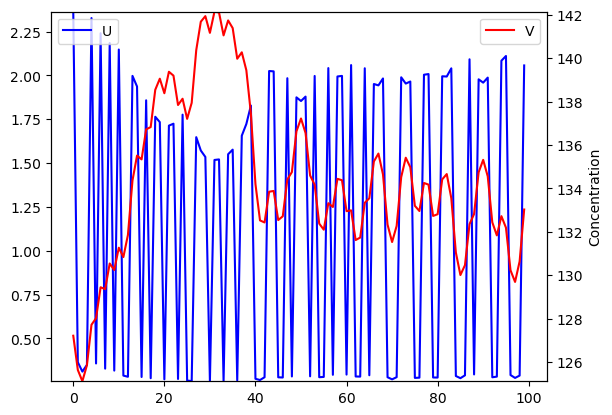

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:5432094_circuit:turinghill_variant:9_samples:1000000


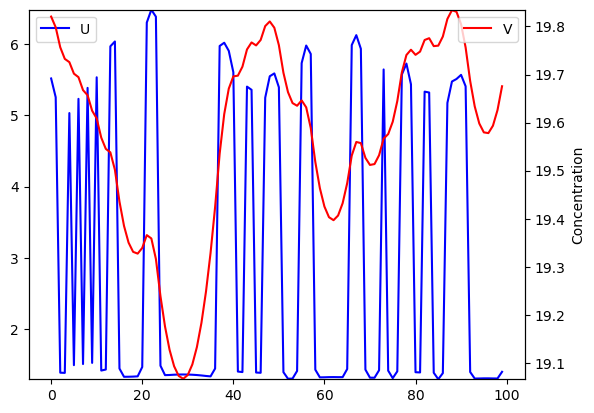

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:719858_circuit:turinghill_variant:9_samples:1000000


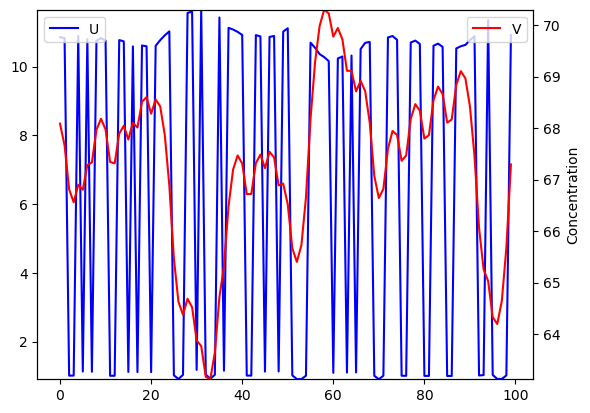

simulation_param_uuid:('f557b922-67b0-4d93-aad1-4a6c362240c9',)
model_param_id:9756511_circuit:turinghill_variant:9_samples:1000000


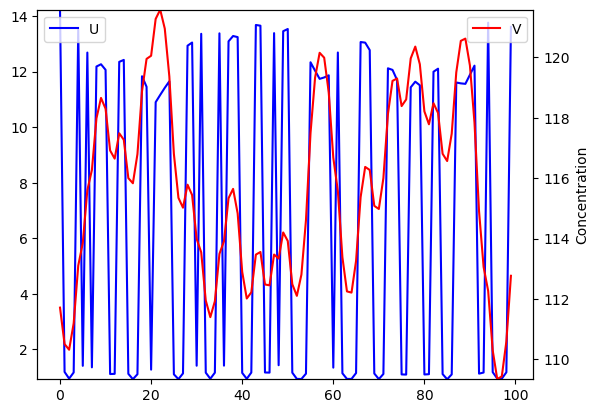

In [24]:
for parID in df.index:
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=0)
    plot1D(U_final, savefig=False,filename='', space_crop=100)

    # U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=0)
    # surfpattern(U_record,L,dx,J,T, savefig=False,filename='',cmap=cm.magma)